# Importing Libraries: 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import joblib

# Load dataset and understand the data 

In [2]:
# Load dataset 
df = pd.read_csv("data/Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,RiskScore,LTI,Education,EmploymentType,MaritalStatus,LoanPurpose,HasMortgage,HasDependents,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,0.000846,0.588262,0,0,0,4,1,1,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,0.001485,2.467481,2,0,1,4,0,0,1,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,0.000687,1.534154,2,3,0,0,1,1,0,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,0.000310,1.412638,1,0,1,1,0,0,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,0.001153,0.447179,0,3,0,0,0,1,0,0


In [3]:
# Other stuff. 
# Check dataset size
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

# Check missing values
print(f'Missing: {df.isnull().sum().sum()}')

# Check data types
print(df.info())

Dataset contains 255347 rows and 20 columns
Missing: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  RiskScore       255347 non-null  float64
 11  LTI             255347 non-null  float64
 12  Education       255347 non-null  int64  
 13  EmploymentType  255347 non-null  int64  
 14  MaritalStatus   255347 non-null  int64  
 15  LoanPurpose     255347 non-null  int64  
 16  H

In [4]:
# Summary Statistics: 
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,RiskScore,LTI,Education,EmploymentType,MaritalStatus,LoanPurpose,HasMortgage,HasDependents,HasCoSigner,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.000949,2.177480,1.494421,1.500096,0.999918,2.000501,0.500014,0.500268,0.500108,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.000542,2.178357,1.118826,1.117358,0.816051,1.412723,0.500001,0.500001,0.500001,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000118,0.033749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000523,0.803628,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000871,1.546720,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.001256,2.671744,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,0.003000,16.532460,3.000000,3.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000


# EDA 

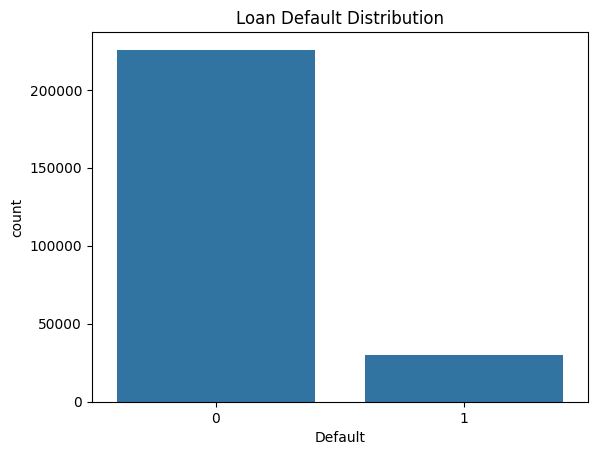

In [5]:
# 1. Analyze the Target Variable (Default) 
# Plot target variable distribution
sns.countplot(x=df["Default"])
plt.title("Loan Default Distribution")
plt.show()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_18256\2653402789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Default", y="CreditScore", data=df, palette="coolwarm")


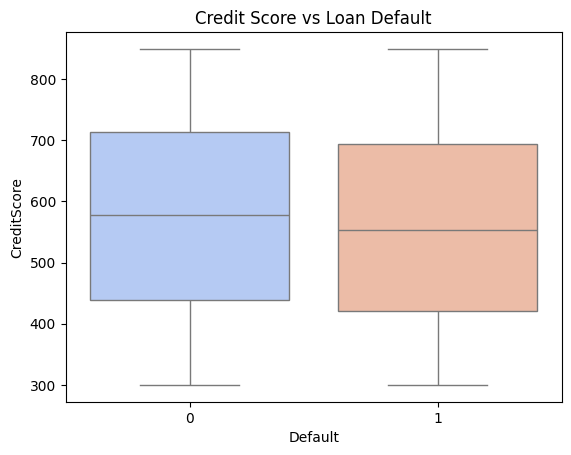

In [6]:
# 2: Credit Score vs Default 
sns.boxplot(x="Default", y="CreditScore", data=df, palette="coolwarm")
plt.title("Credit Score vs Loan Default")
plt.show()

### Insight 1: 
1. Defaulters (1) have a lower median credit score compared to non-defaulters (0).
2. The interquartile range (IQR) for defaulters is slightly lower, meaning most defaulters have credit scores between 400 and 600.
3. Non-defaulters have a slightly higher median (~600 vs ~500 for defaulters), showing that higher credit scores are linked to lower default risk.
4. Both groups have similar minimum and maximum values (~300 to ~850), but distribution varies.

Conclusion: Lower credit scores increase the probability of defaulting. This aligns with real-world financial trends!

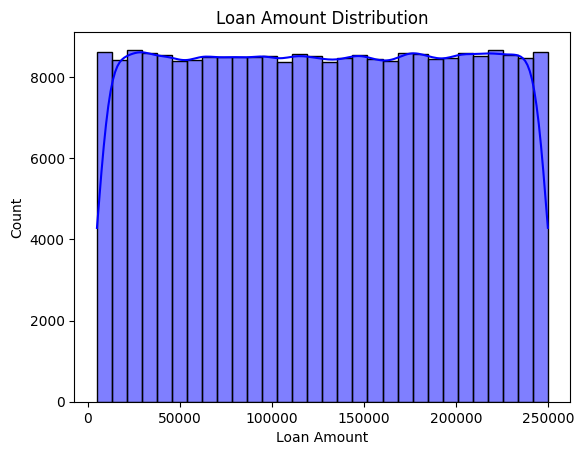

In [8]:
# 3: Loan Amount Distribution 
sns.histplot(df["LoanAmount"], bins=30, kde=True, color="blue")
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.show()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_18256\4115397756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Default", y="LoanAmount", data=df, palette="coolwarm")


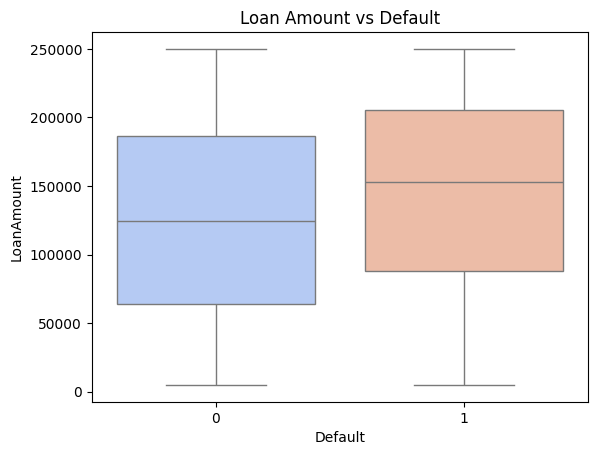

In [9]:
# 4. Loan Amount vs Default 
sns.boxplot(x="Default", y="LoanAmount", data=df, palette="coolwarm")
plt.title("Loan Amount vs Default")
plt.show()

### Insights 2: 
people with higher loan amounts more likely to default.

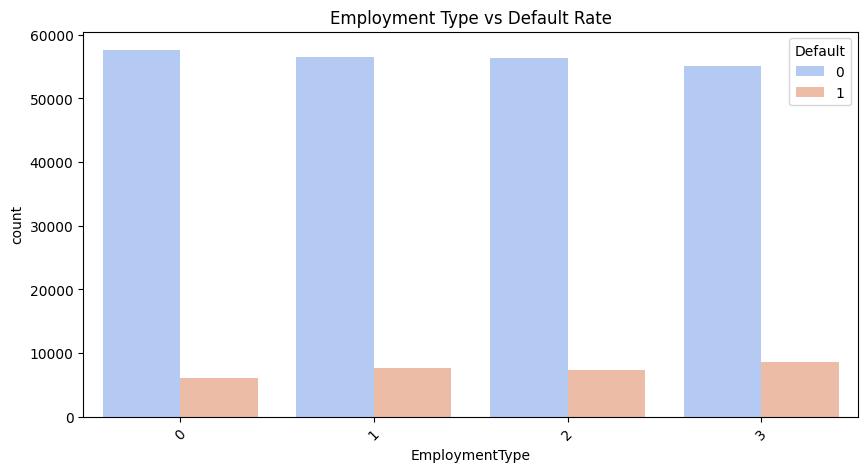

In [10]:
# 5: Employment Type vs Default 
plt.figure(figsize=(10, 5))
sns.countplot(x="EmploymentType", hue="Default", data=df, palette="coolwarm")
plt.title("Employment Type vs Default Rate")
plt.xticks(rotation=45)
plt.show()

### Insight 3: 
Unemployed are most likely to default.. 

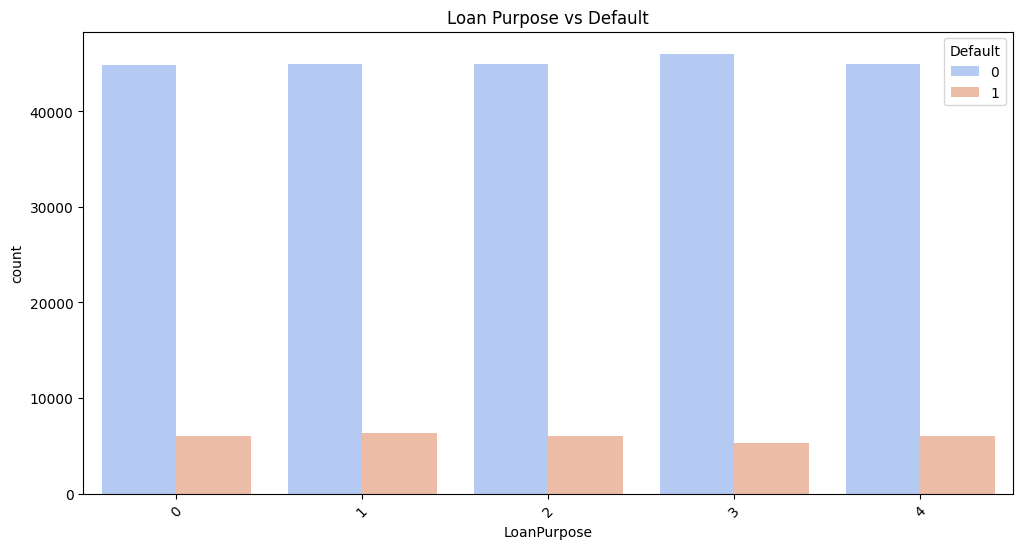

In [11]:
# Loan Purpose vs Default 
plt.figure(figsize=(12, 6))
sns.countplot(x="LoanPurpose", hue="Default", data=df, palette="coolwarm")
plt.title("Loan Purpose vs Default")
plt.xticks(rotation=45)
plt.show()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_18256\701710257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Default", y="Income", data=df, palette="coolwarm")


Text(0.5, 1.0, 'Income vs Loan Default')

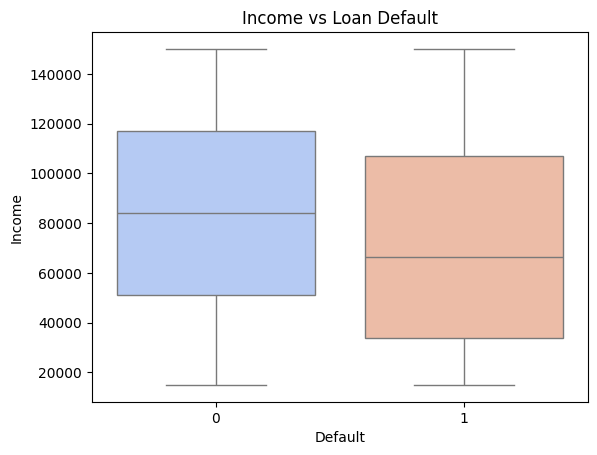

In [12]:
# Income vs default..  
sns.boxplot(x="Default", y="Income", data=df, palette="coolwarm")
plt.title("Income vs Loan Default")
#plt.show()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_18256\3319051541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Default", y="DTIRatio", data=df, palette="coolwarm")


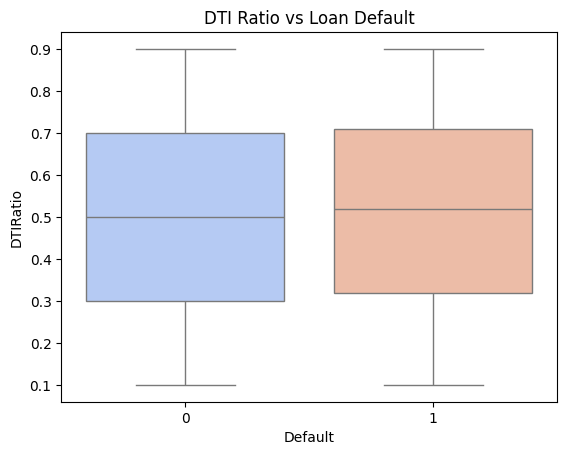

In [13]:
# DTI vs default.. 
sns.boxplot(x="Default", y="DTIRatio", data=df, palette="coolwarm")
plt.title("DTI Ratio vs Loan Default")
plt.show()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_18256\569478254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Default", y="RiskScore", data=df, palette="coolwarm")


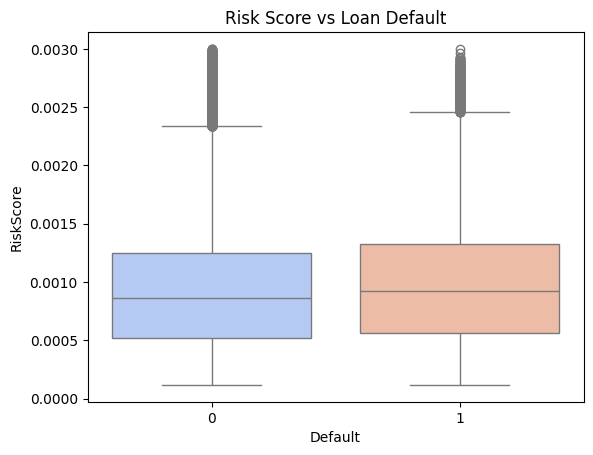

In [14]:
# 1. Visualizing Risk Score vs Default
sns.boxplot(x="Default", y="RiskScore", data=df, palette="coolwarm")
plt.title("Risk Score vs Loan Default")
plt.show()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_18256\1808005513.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Default"] == 0]["RiskScore"], label="Non-Defaulters", shade=True, color="blue")
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_18256\1808005513.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Default"] == 1]["RiskScore"], label="Defaulters", shade=True, color="red")


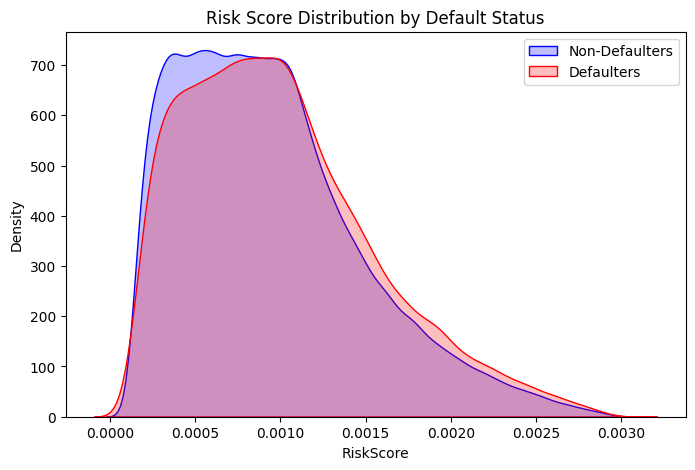

In [15]:
# 1.2: KDE Plot (Risk Score Distribution) 
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["Default"] == 0]["RiskScore"], label="Non-Defaulters", shade=True, color="blue")
sns.kdeplot(df[df["Default"] == 1]["RiskScore"], label="Defaulters", shade=True, color="red")
plt.title("Risk Score Distribution by Default Status")
plt.legend()
plt.show()

In [16]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,RiskScore,LTI,Education,EmploymentType,MaritalStatus,LoanPurpose,HasMortgage,HasDependents,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,0.000846,0.588262,0,0,0,4,1,1,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,0.001485,2.467481,2,0,1,4,0,0,1,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,0.000687,1.534154,2,3,0,0,1,1,0,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,0.000310,1.412638,1,0,1,1,0,0,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,0.001153,0.447179,0,3,0,0,0,1,0,0


In [17]:
df.shape

(255347, 20)

In [19]:
df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

Observations 1 [Problem 1]: 
Class 0 (Non-Defaulters): 225,694

Class 1 (Defaulters): 29,653

The dataset is imbalanced (only ~11.6% of loans defaulted).

Why is this a problem?
If we train a model as-is, it might predict "0" (No Default) most of the time and still get high accuracy.
    
We need to handle this imbalance to ensure the model learns patterns for both defaulters & non-defaulters.

### Handling Class Imbalance using SMOTE.. 
SMOTE creates synthetic data points for the minority class (Default = 1) to balance the dataset.

In [20]:
# Splitting features & target variable
X = df.drop(columns=["Default", "LoanID"])  # Dropping LoanID since it's not useful
y = df["Default"]

# Apply SMOTE
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # Oversampling minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced["Default"] = y_resampled

# Check class balance
print(df_balanced["Default"].value_counts())

Default
0    225694
1    225694
Name: count, dtype: int64


# Feature Scaling: 

In [22]:
scaler = StandardScaler()
numeric_cols = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", 
                "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio", "RiskScore", "LTI"]
categorical_cols = ["Education", "EmploymentType", "MaritalStatus", "LoanPurpose"]
binary_cols = ["HasMortgage", "HasDependents", "HasCoSigner"]

df_balanced[numeric_cols] = scaler.fit_transform(df_balanced[numeric_cols])

df_final = pd.concat([df_balanced[numeric_cols].reset_index(drop=True), 
                      df_balanced[categorical_cols].reset_index(drop=True), 
                      df_balanced[binary_cols].reset_index(drop=True), 
                     df_balanced['Default']], axis=1)
df_final.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,RiskScore,LTI,Education,EmploymentType,MaritalStatus,LoanPurpose,HasMortgage,HasDependents,HasCoSigner,Default
0,1.122196,0.202448,-1.192511,-0.321744,0.767506,1.552973,0.112665,0.007304,-0.308272,-0.245619,-0.762362,0,0,0,4,1,1,1,0
1,2.049218,-0.683934,-0.148217,-0.742789,-1.252748,-1.319021,-1.580673,1.535478,0.818959,1.016397,-0.065481,2,0,1,4,0,0,1,0
2,0.409102,0.157932,-0.081079,-0.790326,-0.910859,0.595642,1.077965,-0.756783,-0.918856,-0.559447,-0.411592,2,3,0,0,1,1,0,1
3,-0.589230,-1.150504,-1.274354,1.192657,-1.718960,0.595642,-1.213404,-0.756783,-1.294600,-1.306120,-0.456654,1,0,1,1,0,0,0,0
4,1.407434,-1.431558,-1.778593,0.445643,-1.470313,1.552973,-1.304408,0.771391,1.053799,0.361285,-0.814680,0,3,0,0,0,1,0,0


# Train test split:

In [23]:
X = df_final.drop(columns=["Default"])  # Features
y = df_final["Default"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Size: {X_train.shape}, Test Size: {X_test.shape}")

Training Size: (361110, 18), Test Size: (90278, 18)


In [24]:
X_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,RiskScore,LTI,Education,EmploymentType,MaritalStatus,LoanPurpose,HasMortgage,HasDependents,HasCoSigner
345372,-0.945777,-0.652852,-1.342623,-1.068759,0.612101,-1.319021,1.536046,1.408130,-1.659562,-1.243253,-0.693667,3,0,0,1,0,0,1
224170,0.623030,0.107160,-1.685593,-1.333609,-0.600050,1.552973,-0.750255,-0.756783,-0.167368,0.585813,-0.909584,0,3,1,3,1,1,0
207243,1.977909,-1.184427,0.840323,0.452434,-0.227081,-0.361690,-1.150025,1.535478,-1.623376,-1.419146,1.394025,1,1,0,4,1,0,0
376250,0.266483,-0.566213,-0.936319,0.880269,1.016152,0.595642,-0.583889,1.471804,1.590732,0.473831,-0.518564,2,1,0,0,1,0,0
186565,1.977909,1.434664,-0.940109,0.540717,-1.221667,0.595642,0.293049,-0.756783,1.805287,0.800706,-0.793117,0,3,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212228,1.050887,0.449479,-1.124695,-1.089132,-1.004101,-0.361690,-1.179277,0.007304,0.725023,1.286969,-0.766361,0,0,2,3,0,0,1
50245,0.908268,-0.358713,-1.828621,-1.578086,-0.413566,-0.361690,1.081215,0.007304,1.241671,2.624726,-0.947790,1,0,1,2,0,1,0
345314,-1.017087,-1.564059,0.969804,0.527135,0.767506,0.595642,-1.706055,0.453022,-0.353904,-0.600758,4.010362,1,1,0,2,0,0,1
356873,-0.803158,1.407321,-0.461634,1.484672,0.985071,-1.319021,-1.035317,-0.756783,-0.399583,-0.861386,-0.698176,1,1,0,0,1,0,0


# Model Traaining: RF

In [26]:
# Initialize the model with the best parameters
best_rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=30,
    bootstrap=False,
    random_state=42,
    n_jobs=-1
)

# Train the model
best_rf.fit(X_train, y_train)

# Predictions
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate Performance
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Tuned Random Forest Accuracy: 0.8868495092935156
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     45139
           1       0.90      0.87      0.88     45139

    accuracy                           0.89     90278
   macro avg       0.89      0.89      0.89     90278
weighted avg       0.89      0.89      0.89     90278



# Feature Importance:

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_18256\3947798149.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.Importance[:10], y=feature_importances.Feature[:10], palette="viridis")


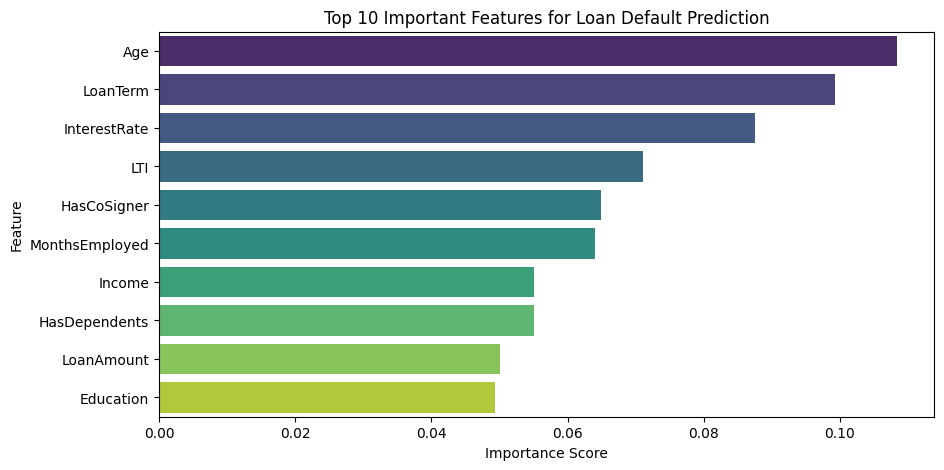

In [28]:
# Get feature importances from the trained Random Forest model
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_rf.feature_importances_})

# Sort by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.Importance[:10], y=feature_importances.Feature[:10], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Important Features for Loan Default Prediction")
plt.show() 

# Saving the Scaler and rf_model 

In [29]:
joblib.dump(scaler, 'scaler.joblib')  # Save the scaler 
joblib.dump(best_rf, 'best_rf.joblib')  # Save the RF model

['best_rf.joblib']